In [6]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
api = wandb.Api()

In [ ]:
project = 'tiny_stories_saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    expansion_factor = run.config.get("expansion_factor", None)
    l1_coef = run.config.get("l1_coefficient", None)
    final_l0_norm = run.summary.get("metrics/l0", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    data.append({
        'expansion_factor': expansion_factor,
        'l1_coef': l1_coef,
        "l0_norm": final_l0_norm,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score
    })

df = pd.DataFrame(data)
print(df)

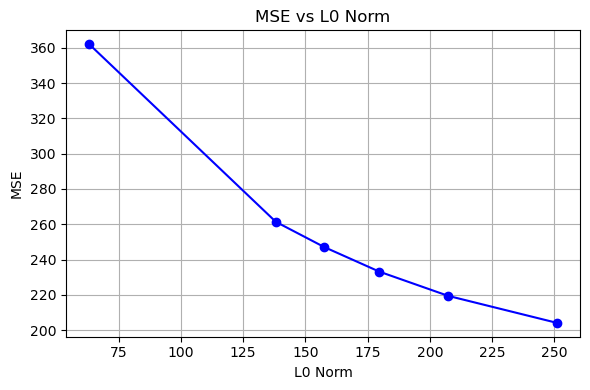

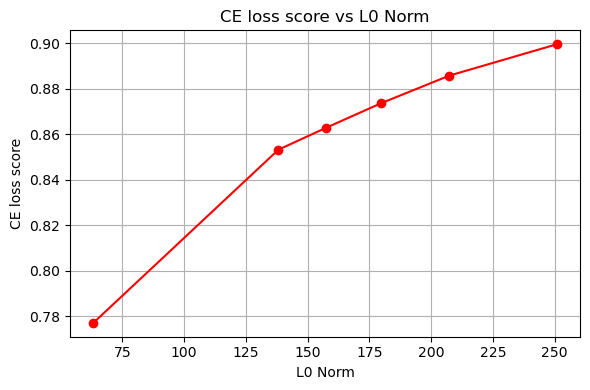

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 4))
# Plot 1: MSE vs L0 norm
ax1.plot(df['l0_norm'], df['mse'], marker='o', linestyle='-', color='b')
ax1.set_title('MSE vs L0 Norm')
ax1.set_xlabel('L0 Norm')
ax1.set_ylabel('MSE')
ax1.grid(True)
plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
# Plot 2: CE loss score vs L0 norm
ax2.plot(df['l0_norm'], df['ce_loss_score'], marker='o', linestyle='-', color='r')
ax2.set_title('CE loss score vs L0 Norm')
ax2.set_xlabel('L0 Norm')
ax2.set_ylabel('CE loss score')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [10]:
project = 'sae_lens_tutorial'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    architecture = run.config.get("architecture", None)
    if architecture == 'standard': 
        continue
    
    expansion_factor = run.config.get("expansion_factor", None)
    layer = run.config.get("hook_layer", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    num_dead = run.summary.get("sparsity/dead_features", None)

    data.append({
        'layer': layer,
        'expansion_factor': expansion_factor,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score,
        "num_dead": num_dead
    })

In [11]:
df = pd.DataFrame(data)
print(df)

    layer  expansion_factor         mse  ce_loss_score  num_dead
0       7                32   13.294584       0.650736       228
1       7                32   10.333755       0.770125       194
2       0                32   50.486359       0.996549      3286
3       1                32  133.680557       0.812639         3
4       2                32   65.437920       0.791119        42
5       3                32  194.713699       0.853042         3
6       4                32  258.841492       0.783736         5
7       5                32  269.738342       0.811752        11
8       6                32  279.606934       0.798306        18
9       7                32  270.851318       0.774405        14
10      8                32  273.469604       0.743115        17
11      9                32  247.977249       0.727235        50
12     10                32  120.167580       0.672254       236
13     10                32  116.976372       0.687415       292
14     11                

In [12]:
# Remove rows from the dataframe by index, for example, to remove rows 0 and 1:
df = df.drop([0, 1, 12]).reset_index(drop=True)
print(df)

    layer  expansion_factor         mse  ce_loss_score  num_dead
0       0                32   50.486359       0.996549      3286
1       1                32  133.680557       0.812639         3
2       2                32   65.437920       0.791119        42
3       3                32  194.713699       0.853042         3
4       4                32  258.841492       0.783736         5
5       5                32  269.738342       0.811752        11
6       6                32  279.606934       0.798306        18
7       7                32  270.851318       0.774405        14
8       8                32  273.469604       0.743115        17
9       9                32  247.977249       0.727235        50
10     10                32  116.976372       0.687415       292
11     11                32  111.326965       0.716735       181


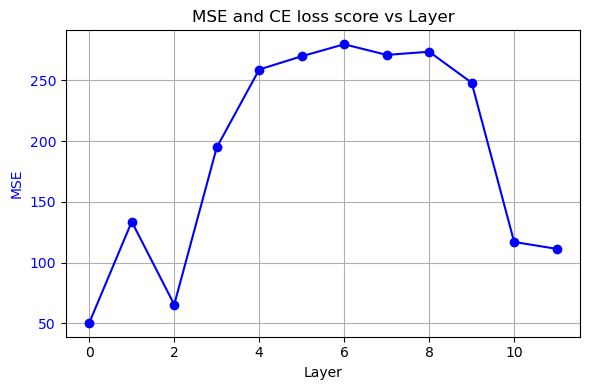

In [ ]:
# Plot 3: MSE and CE loss score vs Layer

plt.tight_layout()
plt.show()